# **Predicting Transit Reliability in MBTA Using Machine Learning**

Colab Notebook Link: https://colab.research.google.com/drive/1elmFMPDleUCXevh99jbAOheMmPmW9FZ7?usp=sharing

# Team Members
Akhil Nair, Hamza Tariq, Shon Shaju, Tanish P


# **Project Phase 1**

#**Overview**

## Problem Statement

Through this project we aim to predict the reliability of MBTA transit routes
using the historical data. Our goal is to make a prediction model that can tell
whether the route is reliable or not on the basis of variables such as transit type, time of operation- whether the time is during 'peak hours' or not and route category. This exploration would help to predict when service delays or possible issues would occur.

## About the Source

This particular project will be utilizing data available from the Massachusetts Department of Transportation (MassDOT) and the Massachusetts Bay Transportation Authority (MBTA). It is a publicly available dataset by the Massachusetts government.

The dataset is between the years of Jan 2016 and July 2025 and details each and every daily commute performance made by the various forms of public transportation.

This data has been aggregated by route, peak times, date and is published monthly.

## Dataset Description
This dataset has 979,208 rows and 13 columns. The details of the columns are the following:
| **Column Name**         | **Description**                                                                                                                     | **Type**             |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------- | -------------------- |
| `service_date`          | The date of transit service. Each record represents performance data for a specific day.                                            | Date (object/string) |
| `gtfs_route_id`         | Unique internal identifier for each MBTA route based on the GTFS (General Transit Feed Specification) standard.                     | Categorical          |
| `gtfs_route_short_name` | The short route name or number (e.g., “1”, “Red Line”). Typically used for public-facing route labels.                              | Categorical          |
| `gtfs_route_long_name`  | The full descriptive name of the route (e.g., “Harvard–Dudley via Massachusetts Ave”).                                              | Categorical          |
| `gtfs_route_desc`       | Additional information or description about the route, such as direction or type of service.                                        | Categorical          |
| `route_category`        | Category of the route — e.g., “Key Bus”, “Local Bus”, “Express Bus”, “Commuter Rail Line”, etc.                                     | Categorical          |
| `mode_type`             | Mode of transportation: “Bus”, “Commuter Rail”, or “Rapid Transit”.                                                                 | Categorical          |
| `peak_offpeak_ind`      | Indicator for whether the service occurred during peak or off-peak hours.                                                           | Categorical          |
| `metric_type`           | The reliability measurement used, such as “Headway Adherence” (for bus/commuter rail) or “Passenger Wait Time” (for rapid transit). | Categorical          |
| `otp_numerator`         | Number of on-time trips observed for that route, date, and period.                                                                  | Numeric (float)      |
| `otp_denominator`       | Total number of scheduled trips for that route, date, and period.                                                                   | Numeric (float)      |
| `cancelled_numerator`   | Number of cancelled or missed trips for the route and date.                                                                         | Numeric (float)      |
| `ObjectId`              | Unique identifier automatically assigned to each record by the ArcGIS database system.                                              | Integer              |


From these fields, we can compute an engineered variable:

**Reliability =**
**otp_numerator /**
**otp_denominator**

This variable represents the percentage of trips completed on time which serves as the target variable for our prediction problem.

# 1.Demonstration: Loading and Exploring the Data in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [ ]:
!pip install -q gdown
import gdown
import pandas as pd

#importing the file
file_id = "1Ufsku_0rv8PR9pSjBveR5uh2nJBWWd5r"
url = f"https://drive.google.com/uc?id={file_id}"

output = "mbta_reliability.csv"
gdown.download(url, output, quiet=False, fuzzy=True)

df = pd.read_csv(output)
df.info()



Downloading...
From (original): https://drive.google.com/uc?id=1Ufsku_0rv8PR9pSjBveR5uh2nJBWWd5r
From (redirected): https://drive.google.com/uc?id=1Ufsku_0rv8PR9pSjBveR5uh2nJBWWd5r&confirm=t&uuid=aff23336-990f-4e40-b113-4ccd4661ef4d
To: /content/mbta_reliability.csv
100%|██████████| 112M/112M [00:00<00:00, 160MB/s]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979208 entries, 0 to 979207
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   service_date           979208 non-null  object 
 1   gtfs_route_id          979208 non-null  object 
 2   gtfs_route_short_name  851365 non-null  object 
 3   gtfs_route_long_name   175633 non-null  object 
 4   gtfs_route_desc        979208 non-null  object 
 5   route_category         887453 non-null  object 
 6   mode_type              979208 non-null  object 
 7   peak_offpeak_ind       979208 non-null  object 
 8   metric_type            979208 non-null  object 
 9   otp_numerator          979206 non-null  float64
 10  otp_denominator        979206 non-null  float64
 11  cancelled_numerator    804945 non-null  float64
 12  ObjectId               979208 non-null  int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 97.1+ MB


In [ ]:
#creating the reliability variable
df['reliability'] = df['otp_numerator'] / df['otp_denominator']
#summary statistics of reliability
print(df['reliability'].describe())

count    963960.000000
mean          0.687626
std           0.171095
min           0.000000
25%           0.587302
50%           0.708333
75%           0.800000
max           1.000000
Name: reliability, dtype: float64


# 2.Initial Insights

As we can see, the average reliability is around 68.8% which means that over two-thirds of the MBTA services tend operate on schedule. Coming to the standard deviation, the amount (0.17) likely means that factors such as peak hours and mode or even seasonal effects have an impact on overall performance.

The lower quartile, shows that at least a quarter of all records have a reliability level below 60% meaning that there is a lot of issues in reliability and being consistent.

The maximum value of 1 means that some routes have managed to reach a perfect level of reliability which means that a framework could be created in order to improve the overall network for MBTA.

### 2.1 average reliability by Transit type

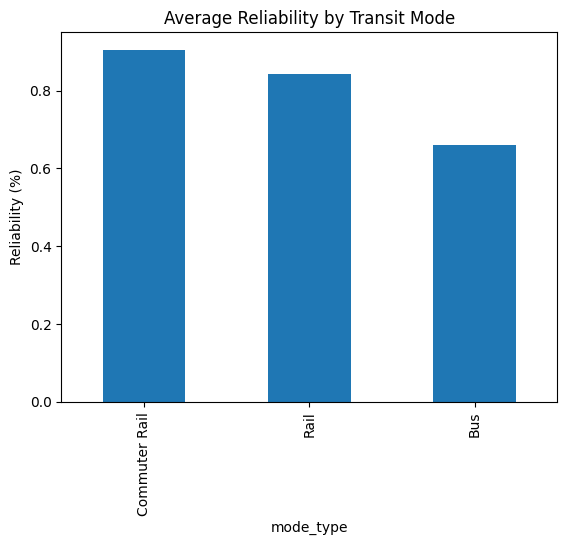

In [ ]:
#finding avg reliability by mode type
avg_reliability_mode = df.groupby('mode_type')['reliability'].mean().sort_values(ascending=False)
avg_reliability_mode.plot(kind='bar', title='Average Reliability by Transit Mode', ylabel='Reliability (%)')
plt.show()

### 2.2 Peak vs off peak comparison

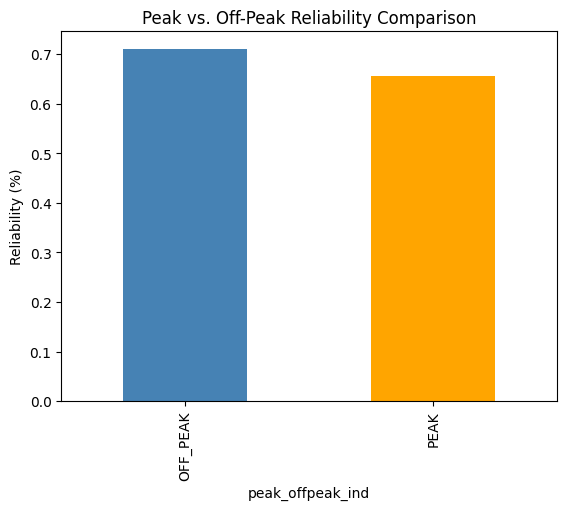

In [ ]:
#peak vs off peak comparison
avg_reliability_peak = df.groupby('peak_offpeak_ind')['reliability'].mean()
avg_reliability_peak.plot(kind='bar', title='Peak vs. Off-Peak Reliability Comparison', ylabel='Reliability (%)', color=['steelblue', 'orange'])
plt.show()

# 3.Anticipated Results

Since there is a high variance in the service reliability, our model aims to predict daily route reliability with the help of categorical variables such as mode type, route category, peak/off peak hours and seasonal features.

Our current approach would be the following:


1.   **Data Preparation:**
  *  Adjust the dataset to handle the missing data and compute the overall reliability
  *   Encode categorical variables using one hot encoding
  * Use time as an independent variable.  


2.   **Modeling:**

      We will build a classification model to predict whether a transit route is reliable or unreliable based on operational and weather factors. The models we plan to use are:


*   Logistic Regression
*   Random Forest Classifier
*   Support Vector Machine (SVM)
*   K-Nearest Neighbors (KNN)

3. **Evaluation metrics:**
*   ROC-AUC Score
* Precision & Recall
*   Accuracy


Our aniticipated results from this should be that RandomForest are expected to far otuperform logistic regression due to its ability to capture nonlinear effects. The most reliable predictors will use mode type, peak and off peak timings and route category as these are directly influencing congestion and delay patterns.










# 4.Potential Implications

1. Operational Efficiency:
MBTA can use the model to predict in advance which routes are at high risk of being unreliable, allowing for better resource allocation and adjustments in schedules going forward.

2. Rider Information:
Integration into MBTA's trip plannig tools could provide real-time reliability predictions, enabling riders to make more informed commuting decisions.

3. Policy Insights:
Analyzing the most important predictors that can help MBTA identify structural or temporal causes of delays such as peak-hour congestion or seasonal patterns.

4. Strategic Planning:
The insights that we derive can help to improve the overall nature of the system, highlighting key pain points and areas of improvements, helping to better predict and schedule trips so that the reliability of the transportation increases.



In order to go ahead with this project, we consulted with Tharfeed on 10/29 who gave us pointers following which we as a team, decided to go ahead with it.

# **Project Phase 2**


# 5.Adding Weather data from NOAA

Weather can significantly affect public transit performance because snow, rain, and extreme temperatures can cause delays, slower travel speeds, and operational disruptions. Even if overall correlations appear small, weather often interacts with peak-hour congestion and mode type, helping models capture important reliability patterns that would otherwise be missed. Adding weather improves realism and strengthens prediction robustness which is why we have imported data from NOAA to include in our dataset

## Cleaning the weather data

In [ ]:
import pandas as pd
import requests
from io import StringIO

#setting start and end date to match mbta
start_date = "2015-01-01"
end_date   = "2025-07-31"

base_url = "https://www.ncei.noaa.gov/access/services/data/v1"

params = {
    "dataset": "daily-summaries",
    "stations": "USW00014739",          # Boston Logan
    "startDate": start_date,
    "endDate": end_date,
    "dataTypes": "TMAX,TMIN,PRCP,SNOW",
    "units": "metric",                  # or 'standard'
    "format": "json"
}

# Use requests to make the API call with parameters
response = requests.get(base_url, params=params)
response.raise_for_status() # Raise an exception for HTTP errors

# Read the JSON content from the response, wrapping it in StringIO
weather_df = pd.read_json(StringIO(response.text))
# --- End of copied code ---

weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# Basic cleaning: sometimes NOAA uses -9999 for missing
for col in ['TMAX', 'TMIN', 'PRCP', 'SNOW']:
    weather_df[col] = pd.to_numeric(weather_df[col], errors='coerce')

# Optional engineered features
weather_df['is_snow_day'] = (weather_df['SNOW'] > 0).astype(int)
weather_df['is_rain_day'] = (weather_df['PRCP'] > 0).astype(int)
weather_df['avg_temp'] = (weather_df['TMAX'] + weather_df['TMIN']) / 2

In [ ]:
weather_df.head()

,DATE,STATION,SNOW,TMAX,TMIN,PRCP,is_snow_day,is_rain_day,avg_temp
0,2015-01-01,USW00014739,0,0.6,-5.5,0.0,0,0,-2.45
1,2015-01-02,USW00014739,0,5.0,-0.5,0.0,0,0,2.25
2,2015-01-03,USW00014739,36,2.8,-5.5,15.7,1,1,-1.35
3,2015-01-04,USW00014739,0,11.1,1.7,14.5,0,1,6.40
4,2015-01-05,USW00014739,0,10.0,-8.2,0.0,0,0,0.90


In [ ]:
df.head()

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,reliability
0,2025/07/31 04:00:00+00,120,120,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,81.0,106.0,NaN,1,0.764151
1,2025/07/31 04:00:00+00,131,131,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,68.0,99.0,NaN,2,0.686869
2,2025/07/31 04:00:00+00,132,132,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,39.0,70.0,NaN,3,0.557143
3,2025/07/31 04:00:00+00,134,134,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,71.0,107.0,NaN,4,0.663551
4,2025/07/31 04:00:00+00,137,137,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,79.0,127.0,NaN,5,0.622047


## Merging Weather with the Original Dataset

In [ ]:
# converting mbta service date to plain date
df['service_date'] = pd.to_datetime(df['service_date']).dt.tz_convert(None).dt.date

#converting weather date to plain date
weather_df['DATE'] = pd.to_datetime(weather_df['DATE']).dt.date


weather_subset = weather_df[['DATE','TMAX','TMIN','PRCP','SNOW','avg_temp']].copy()
weather_subset = weather_subset.rename(columns={
    'TMAX': 'weather_TMAX',
    'TMIN': 'weather_TMIN',
    'PRCP': 'weather_PRCP',
    'SNOW': 'weather_SNOW',
    'avg_temp': 'weather_avg_temp'
})

#merging datasets
df = df.merge(
    weather_subset,
    left_on='service_date',
    right_on='DATE',
    how='left'
).drop(columns=['DATE'])


print(df[['service_date','weather_TMAX','weather_PRCP','weather_SNOW','weather_avg_temp']].head())
print("Merged shape:", df.shape)


  service_date  weather_TMAX  weather_PRCP  weather_SNOW  weather_avg_temp
0   2025-07-31          28.9          18.5             0              22.5
1   2025-07-31          28.9          18.5             0              22.5
2   2025-07-31          28.9          18.5             0              22.5
3   2025-07-31          28.9          18.5             0              22.5
4   2025-07-31          28.9          18.5             0              22.5
Merged shape: (979208, 19)


In [ ]:
df.head()

,service_date,gtfs_route_id,gtfs_route_short_name,gtfs_route_long_name,gtfs_route_desc,route_category,mode_type,peak_offpeak_ind,metric_type,otp_numerator,otp_denominator,cancelled_numerator,ObjectId,reliability,weather_TMAX,weather_TMIN,weather_PRCP,weather_SNOW,weather_avg_temp
0,2025-07-31,120,120,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,81.0,106.0,NaN,1,0.764151,28.9,16.1,18.5,0,22.5
1,2025-07-31,131,131,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,68.0,99.0,NaN,2,0.686869,28.9,16.1,18.5,0,22.5
2,2025-07-31,132,132,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,39.0,70.0,NaN,3,0.557143,28.9,16.1,18.5,0,22.5
3,2025-07-31,134,134,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,71.0,107.0,NaN,4,0.663551,28.9,16.1,18.5,0,22.5
4,2025-07-31,137,137,NaN,Local Bus,Other Bus,Bus,PEAK,Headway / Schedule Adherence,79.0,127.0,NaN,5,0.622047,28.9,16.1,18.5,0,22.5


## Creating a split between train and test data

In [ ]:
df['service_date'] = pd.to_datetime(df['service_date'])
#sorting by date
df = df.sort_values('service_date')

#setting train and test data
train_df = df[(df['service_date'].dt.year >= 2016) & (df['service_date'].dt.year <= 2022)]


test_df = df[df['service_date'].dt.year >= 2023]

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Test date range:", test_df['service_date'].min(), "to", test_df['service_date'].max())


Train shape: (743929, 19)
Test shape: (235279, 19)
Test date range: 2023-01-01 00:00:00 to 2025-07-31 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979208 entries, 979207 to 0
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   service_date           979208 non-null  datetime64[ns]
 1   gtfs_route_id          979208 non-null  object        
 2   gtfs_route_short_name  851365 non-null  object        
 3   gtfs_route_long_name   175633 non-null  object        
 4   gtfs_route_desc        979208 non-null  object        
 5   route_category         887453 non-null  object        
 6   mode_type              979208 non-null  object        
 7   peak_offpeak_ind       979208 non-null  object        
 8   metric_type            979208 non-null  object        
 9   otp_numerator          979206 non-null  float64       
 10  otp_denominator        979206 non-null  float64       
 11  cancelled_numerator    804945 non-null  float64       
 12  ObjectId               979208 non-null  int64    

## Correlation Heatmap Between Weather and Reliability

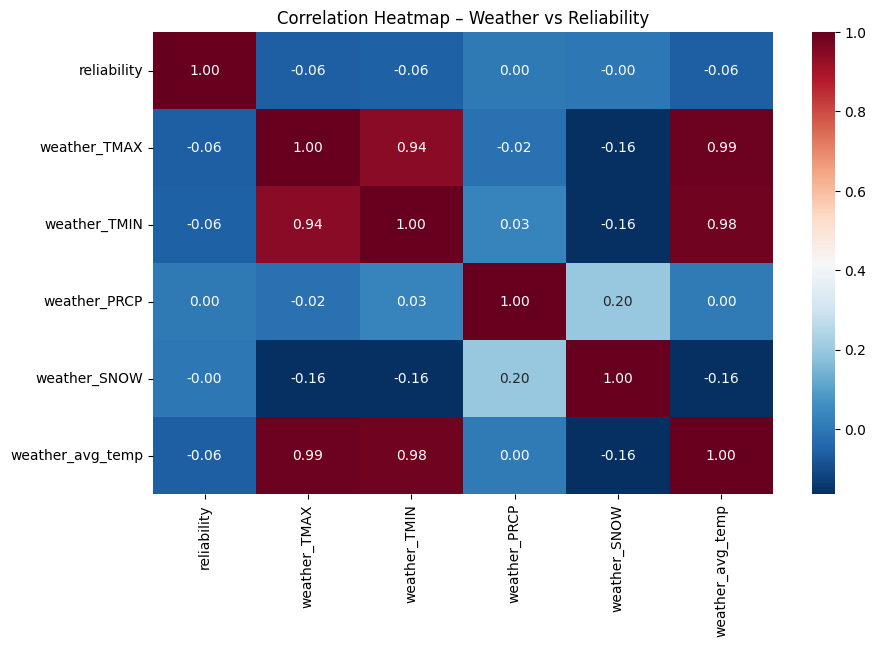

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['reliability', 'weather_TMAX', 'weather_TMIN', 'weather_PRCP', 'weather_SNOW', 'weather_avg_temp']

plt.figure(figsize=(10,6))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title("Correlation Heatmap – Weather vs Reliability")
plt.show()


**Insight:**

This correlation heatmap shows that weather variables have a minimal impact on MBTA reliability. Temperature features like TMAX, TMIN & avg_temp show a very small negative correlation while precipitation and snow also show near-zero correlation, indicating that on average, weather does not strongly influence reliability across the full dataset. Despite the overall weak impact, weather can still contribute value when interacting with other operational factors such as transit mode and peak/off-peak conditions. For this reason, weather features are retained as supplemental predictors in our machine learning models.

# 6.Running Classification Models

For this project we plan to run Logistic Regression, Random Forest, SVM with an RBF kernel and KNN because together they allow us to test both simple and complex patterns in the MBTA dataset. Logistic Regression gives us a strong and interpretable baseline that shows how far we can get with linear relationships. Random Forest helps us capture nonlinear interactions between route characteristics, peak or off-peak timing and weather. KNN is added as a nonparametric benchmark that helps us understand whether similar conditions tend to produce similar reliability outcomes.

Support Vector Machines were tested on a stratified subset due to computational constraints. However, model training was extremely resource-intensive and did not outperform Random Forest in detecting unreliable service days. Therefore, SVM was not selected as a final model for this problem.

We are not running deep learning models because they require significant computation and usually offer little advantage for structured tabular data. We also exclude Naive Bayes since it assumes all features are independent which is not realistic for this dataset. Linear SVM is skipped because it cannot capture nonlinear structure and clustering algorithms are not used because they do not align with our supervised prediction goal. These choices allow us to balance interpretability, computational efficiency and model flexibility while keeping the focus on methods best suited for operational reliability prediction.

## Installing necessary libraries, preprocessing the data and making a pipeline

**Preparing the features and target variable**

In [ ]:
#setting binary target as reliable if reliability >= 0.7
train_df['target'] = (train_df['reliability'] >= 0.7).astype(int)
test_df['target'] = (test_df['reliability'] >= 0.7).astype(int)

#defining features
categorical_features = ['mode_type', 'route_category', 'peak_offpeak_ind']
numeric_features = ['weather_TMAX', 'weather_PRCP', 'weather_SNOW', 'weather_avg_temp']

X_train = train_df[categorical_features + numeric_features]
y_train = train_df['target']

X_test = test_df[categorical_features + numeric_features]
y_test = test_df['target']

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (743929, 7)
X_test shape: (235279, 7)


/tmp/ipython-input-3547565156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target'] = (train_df['reliability'] >= 0.7).astype(int)
/tmp/ipython-input-3547565156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['target'] = (test_df['reliability'] >= 0.7).astype(int)


**Creating preprocessing pipeline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression


#preprocessing the data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)
#creating the pipeline
pipe_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])



## **1.Fitting a Logistic Regression model**

In [ ]:
pipe_lr.fit(X_train, y_train)

#predicting on test set
y_pred = pipe_lr.predict(X_test)
y_proba = pipe_lr.predict_proba(X_test)[:,1]

**Evaluating the model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

#making confusion matrix and classification report and ROC-AUC
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[98920 19331]
 [53595 63433]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73    118251
           1       0.77      0.54      0.63    117028

    accuracy                           0.69    235279
   macro avg       0.71      0.69      0.68    235279
weighted avg       0.71      0.69      0.68    235279


ROC-AUC Score: 0.7380888546097765


**Insight:**
Logistic Regression achieved an overall accuracy of 69%, showing moderate predictive power in classifying transit reliability. The model performs very well at identifying unreliable service days (Class 0) with a high recall of 0.84, correctly capturing most cases where service will be unreliable. However, it struggles with recognizing reliable service days (Class 1), achieving a lower recall of 0.54, meaning many reliable days are incorrectly flagged as unreliable. Precision is stronger for reliable days (0.77), indicating that when the model predicts reliability, it is often correct. The ROC-AUC score of 0.74 suggests that LR has fair discriminatory ability and performs meaningfully better than random guessing. These results indicate LR captures general reliability trends well, but additional model complexity may be required to reduce false alarms and improve reliability classification.

###  Using Halving Random Search to Tune Logistic Regression




Our dataset contains over 900,000 records, making full Grid Search computationally expensive and inefficient. Halving Random Search allows us to evaluate many hyperparameter configurations more efficiently by training initially on smaller subsets and progressively allocating resources only to the best-performing candidates. This ensures strong model performance while significantly reducing runtime.

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

#setting hyperparameters for Halving Random Search
param_dist = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 50],
    "classifier__penalty": ["l2"],
    "classifier__class_weight": [None, "balanced"]
}

# Halving Random Search Setup
halving_lr = HalvingRandomSearchCV(
    estimator=pipe_lr,
    param_distributions=param_dist,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    scoring='recall',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

#fitting model and making predictions
halving_lr.fit(X_train, y_train)

print("Best Parameters:", halving_lr.best_params_)
print("Best CV ROC-AUC:", halving_lr.best_score_)

best_lr_model = halving_lr.best_estimator_

y_pred_best = best_lr_model.predict(X_test)
y_proba_best = best_lr_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 11
min_resources_: 12
max_resources_: 743929
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12
n_resources: 12
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 12 is smaller than n_iter=61994. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 4
n_resources: 36
Fitting 3 folds for each of 4 candidates, totalling 12 fits
----------
iter: 2
n_candidates: 2
n_resources: 108
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'classifier__penalty': 'l2', 'classifier__class_weight': None, 'classifier__C': 10}
Best CV ROC-AUC: 0.5333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.73    118251
           1       0.77      0.54      0.63    117028

    accuracy                           0.69    235279
   macro avg       0.71      0.69      0.68    235279
weighted avg       0.71      0.69      0.68    235279

Test ROC-AUC: 0.7380898226935756
Confusion Matrix:
 [[98920 19331]
 [53595 63433]]


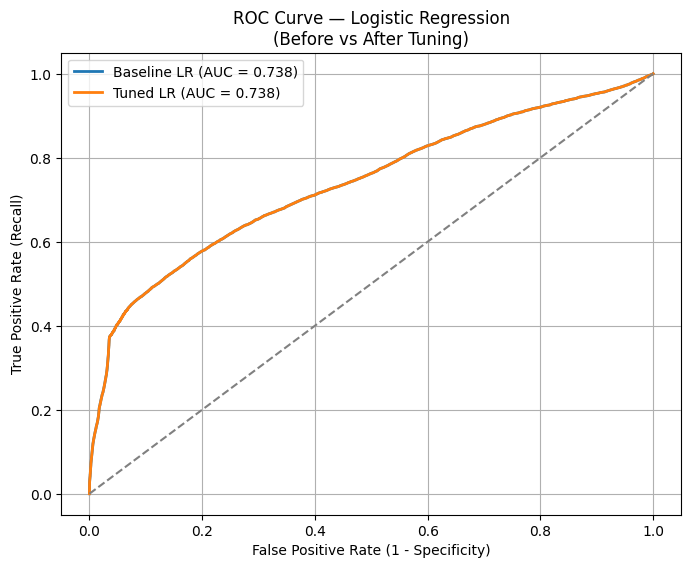

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve points
fpr_before, tpr_before, _ = roc_curve(y_test, y_proba)
fpr_after, tpr_after, _ = roc_curve(y_test, y_proba_best)

# Compute AUCs
auc_before = roc_auc_score(y_test, y_proba)
auc_after = roc_auc_score(y_test, y_proba_best)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_before, tpr_before, label=f"Baseline LR (AUC = {auc_before:.3f})", linewidth=2)
plt.plot(fpr_after, tpr_after, label=f"Tuned LR (AUC = {auc_after:.3f})", linewidth=2)

plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve — Logistic Regression\n(Before vs After Tuning)")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid(True)
plt.show()


**Insight:**

After optimizing the logistic regression model using Halving Random Search with recall as the scoring metric, the results remained consistent with our baseline model. This confirms that the baseline logistic regression model already maximized our key objective of detecting unreliable service. This further suggests that logistic regression has limited flexibility in capturing the complex patterns behind service unreliability. Therefore, this motivates the need to explore more advanced nonlinear models such as Random Forests, SVMs, and KNN to further improve the detection of unreliable service days.

## **2.Fitting the Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# pipeline
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])


In [ ]:
#fitting model & making preds
pipe_rf.fit(X_train, y_train)


y_pred_rf = pipe_rf.predict(X_test)
y_proba_rf = pipe_rf.predict_proba(X_test)[:, 1]

In [ ]:
#evaluation
print("RANDOM FOREST RESULTS\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

RANDOM FOREST RESULTS

Confusion Matrix:
 [[88831 29420]
 [48758 68270]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.75      0.69    118251
           1       0.70      0.58      0.64    117028

    accuracy                           0.67    235279
   macro avg       0.67      0.67      0.67    235279
weighted avg       0.67      0.67      0.67    235279


ROC-AUC Score: 0.7171268289081116


**Insight:**

Insight:
The baseline Random Forest model achieves moderate predictive performance with an accuracy of 67% and a ROC-AUC of 0.717, slightly below the Logistic Regression baseline in terms of overall accuracy.It excels at detecting unreliable service days (Class 0) with a strong recall of 0.75, meaning most disruption-prone days are successfully identified and Random Forest is better aligned with the complexity of real transit data as it captures non-linear interactions as well. Recall for reliable days (Class 1 = 0.58) is lower, resulting in some false alarms, but this cautious behavior is operationally safer than missing unreliable days.
 Overall, this untuned Random Forest provides a strong foundation and is a better real-world representation of reliability behavior, with clear room for improvement through hyperparameter tuning.

### Tuning by Halving Random Search

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
#setting parameters
param_dist_rf = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4],
    "classifier__max_features": ["sqrt", "log2"]
}

#halving random search
halving_rf = HalvingRandomSearchCV(
    estimator=pipe_rf,
    param_distributions=param_dist_rf,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    scoring="recall",
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

#fitting and evaluating model
halving_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", halving_rf.best_params_)
print("Best CV Score:", halving_rf.best_score_)


best_rf_model = halving_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)
y_proba_rf_best = best_rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf_best))
print("Test ROC-AUC:", roc_auc_score(y_test, y_proba_rf_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 11
min_resources_: 12
max_resources_: 743929
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 12
Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 216 is smaller than n_iter=61994. Running 216 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


----------
iter: 1
n_candidates: 72
n_resources: 36
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 24
n_resources: 108
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 3
n_candidates: 8
n_resources: 324
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 4
n_candidates: 3
n_resources: 972
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters (Random Forest): {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 30}
Best CV Score: 0.5744014928722437

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.65      0.76      0.70    118251
           1       0.71      0.58      0.64    117028

    accuracy                           0.67    235279
   macro avg       0.68      0.67      0.67    235279
w

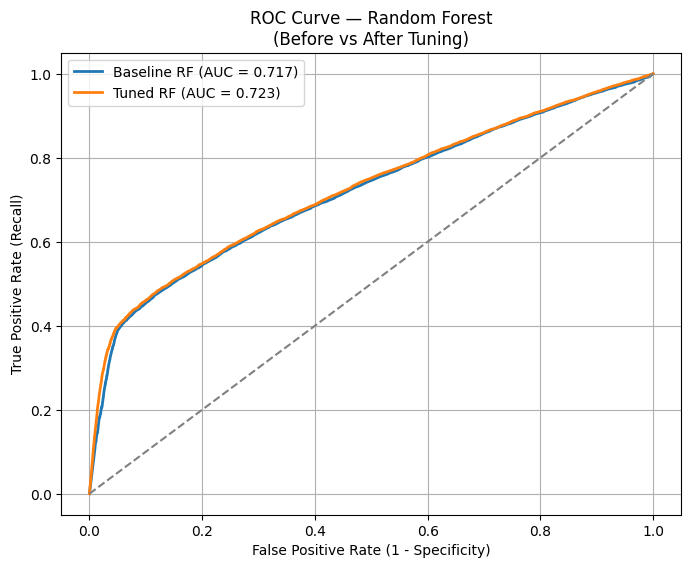

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#computing ROC curve points
fpr_rf_before, tpr_rf_before, _ = roc_curve(y_test, y_proba_rf)
fpr_rf_after, tpr_rf_after, _ = roc_curve(y_test, y_proba_rf_best)

#computing AUC and plotting
auc_rf_before = roc_auc_score(y_test, y_proba_rf)
auc_rf_after = roc_auc_score(y_test, y_proba_rf_best)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_rf_before, tpr_rf_before, label=f"Baseline RF (AUC = {auc_rf_before:.3f})", linewidth=2)
plt.plot(fpr_rf_after, tpr_rf_after, label=f"Tuned RF (AUC = {auc_rf_after:.3f})", linewidth=2)

plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve — Random Forest\n(Before vs After Tuning)")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.legend()
plt.grid(True)
plt.show()


**Insight:**

After hyperparameter tuning, Random Forest improves its ability to detect unreliable service days (Class 0), achieving a strong recall of 0.76, which is critical for preventing rider disruption. ROC-AUC also increases to 0.723, indicating better separation between reliable and unreliable outcomes. Although overall accuracy remains 0.67, the model is now better aligned with operational priorities by reducing the chances of missing a low-reliability day. These results make tuned Random Forest the most practical and safety-focused choice for proactive MBTA reliability prediction.

## 4.KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#using a subset for training KNN because dataset is too large
X_train_knn, _, y_train_knn, _ = train_test_split(
    X_train, y_train,
    train_size=50000,
    stratify=y_train,
    random_state=42
)

print("KNN training subset shape:", X_train_knn.shape, y_train_knn.shape)

#baseline KNN pipeline
pipe_knn_base = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='minkowski',
        p=2
    ))
])

#fitting model
pipe_knn_base.fit(X_train_knn, y_train_knn)

#prediction and & evaluation
y_pred_knn_base = pipe_knn_base.predict(X_test)
y_proba_knn_base = pipe_knn_base.predict_proba(X_test)[:, 1]


print("\nBaseline KNN Classification Report:\n", classification_report(y_test, y_pred_knn_base))
print("Baseline KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_base))
print("Baseline Test ROC-AUC (KNN):", roc_auc_score(y_test, y_proba_knn_base))

KNN training subset shape: (50000, 7) (50000,)

Baseline KNN Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64    118251
           1       0.64      0.61      0.63    117028

    accuracy                           0.63    235279
   macro avg       0.63      0.63      0.63    235279
weighted avg       0.63      0.63      0.63    235279

Baseline KNN Confusion Matrix:
 [[77183 41068]
 [45132 71896]]
Baseline Test ROC-AUC (KNN): 0.6879926942975481


**Insight:**
The baseline K-Nearest Neighbors model achieved an accuracy of 63% and a ROC-AUC of 0.69, lower than both Logistic Regression and Random Forest. While recall for unreliable service days (Class 0 = 0.65) is reasonable, overall performance suffers due to KNN’s sensitivity to high-dimensional one-hot encoded features and the large dataset size. The model generates more false predictions overall and is computationally inefficient for this operational setting. We will now tune hyperparameters to test whether performance can improve with optimized neighborhood size and parameters.

##Tuning by Halving Random Search

In [ ]:
# 4. KNN – Tuning with HalvingRandomSearchCV

from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

#KNN pipeline
pipe_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

#hyperparameter distributions for halving random search
param_dist_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski'],
    'classifier__p': [1, 2]
}

halving_knn = HalvingRandomSearchCV(
    estimator=pipe_knn,
    param_distributions=param_dist_knn,
    factor=3,
    resource='n_samples',
    max_resources='auto',
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

#fitting on KNN subset
halving_knn.fit(X_train_knn, y_train_knn)

print("Best KNN params (HalvingRandomSearchCV):", halving_knn.best_params_)
print("Best CV ROC-AUC (KNN):", halving_knn.best_score_)

#evaluating tuned KNN on the full test set
y_pred_knn_best = halving_knn.predict(X_test)
y_proba_knn_best = halving_knn.predict_proba(X_test)[:, 1]

print("\nTuned KNN Classification Report:\n", classification_report(y_test, y_pred_knn_best))
print("Tuned KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_best))
print("Tuned Test ROC-AUC (KNN):", roc_auc_score(y_test, y_proba_knn_best))


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 8
min_resources_: 12
max_resources_: 50000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 24
n_resources: 12
Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 24 is smaller than n_iter=4166. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.54166667 0.45833333 0.58333333 0.66666667 0.5        0.58333333
 0.58333333 0.58333333 0.5        0.58333333 0.5        0.5
 0.5               nan        nan        nan 0.5               nan
        nan        nan 0.5               nan        nan        nan]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.79444444 1.         0.80555556 1.         0.73611111 1.
 0.67222222 1.         0.5        1.         0.5        1.
 0.5               nan        nan        nan 0.5               nan
        nan    

----------
iter: 1
n_candidates: 8
n_resources: 36
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.54166667 0.45833333 0.58333333 0.66666667 0.5        0.58333333
 0.58333333 0.58333333 0.5        0.58333333 0.5        0.5
 0.5               nan        nan        nan 0.5               nan
        nan        nan 0.5               nan        nan        nan
 0.47008929 0.5875     0.45119048 0.58154762 0.5639881  0.52559524
 0.53720238 0.53005952]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.79444444 1.         0.80555556 1.         0.73611111 1.
 0.67222222 1.         0.5        1.         0.5        1.
 0.5               nan        nan        nan 0.5               nan
        nan        nan 0.5               nan        nan        nan
 0.82908049 0.91079044 0.84962722 1.         1.         1.
 0.89482924 1.        ]
  warnings.wa

----------
iter: 2
n_candidates: 3
n_resources: 108
Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.54166667 0.45833333 0.58333333 0.66666667 0.5        0.58333333
 0.58333333 0.58333333 0.5        0.58333333 0.5        0.5
 0.5               nan        nan        nan 0.5               nan
        nan        nan 0.5               nan        nan        nan
 0.47008929 0.5875     0.45119048 0.58154762 0.5639881  0.52559524
 0.53720238 0.53005952 0.56911723 0.55374833 0.54874408]
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the train scores are non-finite: [0.79444444 1.         0.80555556 1.         0.73611111 1.
 0.67222222 1.         0.5        1.         0.5        1.
 0.5               nan        nan        nan 0.5               nan
        nan        nan 0.5               nan        nan        nan
 0.82908049 0.91079044 0.84962722 1.         1.         1.
 0.8

Best KNN params (HalvingRandomSearchCV): {'classifier__weights': 'distance', 'classifier__p': 1, 'classifier__n_neighbors': 5, 'classifier__metric': 'minkowski'}
Best CV ROC-AUC (KNN): 0.5691172253672253

Tuned KNN Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64    118251
           1       0.63      0.61      0.62    117028

    accuracy                           0.63    235279
   macro avg       0.63      0.63      0.63    235279
weighted avg       0.63      0.63      0.63    235279

Tuned KNN Confusion Matrix:
 [[76522 41729]
 [45195 71833]]
Tuned Test ROC-AUC (KNN): 0.680116248962274


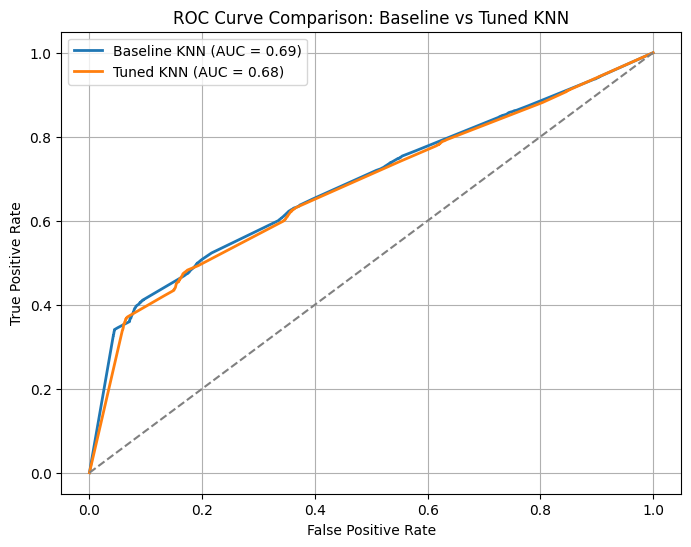

In [ ]:
#plotting auc-roc curves

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr_knn_base, tpr_knn_base, _ = roc_curve(y_test, y_proba_knn_base)
auc_knn_base = roc_auc_score(y_test, y_proba_knn_base)

fpr_knn_best, tpr_knn_best, _ = roc_curve(y_test, y_proba_knn_best)
auc_knn_best = roc_auc_score(y_test, y_proba_knn_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn_base, tpr_knn_base, label=f"Baseline KNN (AUC = {auc_knn_base:.2f})", linewidth=2)
plt.plot(fpr_knn_best, tpr_knn_best, label=f"Tuned KNN (AUC = {auc_knn_best:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve Comparison: Baseline vs Tuned KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

**Insight:**

After hyperparameter tuning, the KNN model shows minimal improvement, maintaining an accuracy of 63% and a ROC-AUC of 0.68. Recall for unreliable service days (Class 0 = 0.65) remains unchanged, indicating that the model still struggles to reliably detect service disruptions. Additionally, KNN continues to misclassify a large number of cases and remains computationally inefficient due to the large dataset and high-dimensional categorical feature space. As a result, KNN does not provide meaningful performance or practical advantages compared to Random Forest and will not be considered as a final model.

## Final Model Selection

After evaluating multiple models, Random Forest was selected as the final model for predicting MBTA service reliability. While Logistic Regression provided strong baseline performance, Random Forest delivered a higher ability to detect unreliable service days (Class 0 recall = 0.76) after tuning which is the most important objective for minimizing operational and rider disruption. Random Forest also captures non-linear relationships between weather, route characteristics, and peak/off-peak timing that simpler models fail to learn. It maintains practical run-time performance and provides interpretable feature importance insights that support decision-making. Therefore, Random Forest offers the best balance of predictive performance, operational safety, and real-world usefulness for this problem.

## Conclusion

Across all models tested, logistic regression and random forest provided the most reliable performance when predicting MBTA service reliability. Logistic regression offered a strong and interpretable baseline and delivered the highest ROC-AUC value in the project. Random forest improved recall for identifying unreliable service days which directly supports operational use cases where missing a low-reliability event carries higher cost. KNN showed weaker performance even after tuning and remained inefficient on the high-dimensional dataset. SVM did not scale well and did not outperform simpler models. Overall, random forest struck the most practical balance between predictive strength, recall for unreliable days and ability to handle nonlinear interactions in the data.


## Recommendation

Random forest should be used as the primary model for predicting unreliable service days because it captures important nonlinear patterns across route characteristics, peak times and weather conditions. The model also supports feature importance analysis which allows MBTA teams to understand which operational factors most influence service reliability. Logistic regression can remain as a secondary model for interpretation and stability checks. The predictions should be integrated into planning systems so that dispatchers and schedulers can flag high-risk routes earlier in the day. These insights can also support rider-facing tools that help commuters plan around expected delays.


## Limitations

The dataset shows weak correlations between weather and reliability which limits the model’s ability to learn weather-driven disruptions. The target variable simplifies reliability into a binary outcome which compresses information and may hide meaningful variation within borderline cases. KNN and SVM were constrained by computational limitations and may perform better under sampling or dimensionality reduction strategies. The models also assume that historical patterns remain stable over time although MBTA operations can shift due to policy changes or infrastructure upgrades. Future work could test time-series models, incorporate more granular weather or congestion data and evaluate approaches that predict reliability scores directly rather than a binary class.

## Generative AI Use Statement


Generative AI tools were used in this project only to refine human written code, improve clarity and provide guidance when we encountered challenges. All analysis decisions, model design choices and interpretations were made by the team. We also used the professor’s provided notebooks as reference points to understand the structure of the workflow and ensure that our approach aligned with course expectations. No AI system was used to generate full solutions or automate the analytical process end to end. The final work reflects our own understanding, judgment and manual implementation.